## SciPy

* The most important part of SciPy for us is scipy.sparse: this provides
sparse matrices. Sparse matrices are used whenever we want to store a 2D array that contains mostly zeros.

In [0]:
import numpy as np
from scipy import sparse

In [0]:
# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))

NumPy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0




# 1. Optimization and Minimization
* Solve minimization problems.
* Some classic examples are performing linear regression, finding a function’s minimum and maximum values, determining the root of a function, and finding where two functions intersect.
* The optimization and minimization tools that NumPy and SciPy provide
are great, but they do not have Markov Chain Monte Carlo (MCMC)
capabilities—in other words, Bayesian analysis. There are several popular
MCMC Python packages like PyMC.
[PyMC](https://http://pymc-devs.github.io/pymc/)

* Example of simple linear regression.


# 1.1. Data Modeling and Fitting

* generating clean data x.
* f (x) = ax + b = y. (function used to model: linear equation)
* yn = y + noise  (noisy data)
* Using curve_fit

***STEP 1:*** ***Define the data to be fit with some noise:***



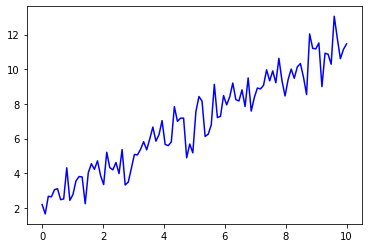

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
  return(a*x+b) # Creating a function to model and create data
#f (x) = ax + b = y. (function used to model: linear equation)

x = np.linspace(0, 10, 100)   # Generating clean data
y = func(x, 1, 2)       

yn = y + 0.9 * np.random.normal(size=len(x))  # Adding noise to the data

plt.plot(x, yn, 'b-', label='data')

***STEP 2: Fit for the parameters a, b, c of the function func:***

* popt returns: Optimal values for the parameters so that the sum of the squared residuals of {f(x, *popt) - yn} is minimized.
* The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))

[0.92818361 2.285869  ]
[[ 0.00075088 -0.0037544 ]
 [-0.0037544   0.02515576]]


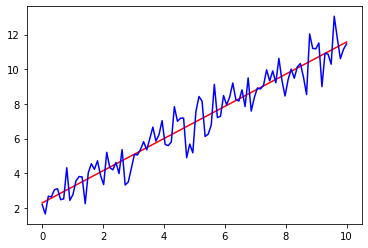

In [0]:
popt, pcov = curve_fit(func, x, yn)
print(popt)
print(pcov)
plt.plot(x, func(x, *popt), 'r-', x,  yn, 'b-')

***Similarly we can define gaussian and double gaussian functions i.e. non-linear functions to model our curve.***

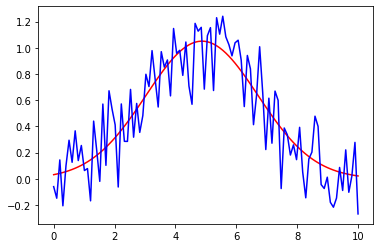

In [0]:
# Two-Gaussian model
def func_gauss(x, a, b, c):
  return a*np.exp(-(x-b)**2/(2*c**2))

# Two-Gaussian model
def func_doublegauss(x, a0, b0, c0, a1, b1,c1):
  return a0*np.exp(-(x - b0) ** 2/(2 * c0 ** 2))\
+ a1 * np.exp(-(x - b1) ** 2/(2 * c1 ** 2))

y_gauss=func_gauss(x,1, 5, 2)
yn_gauss = y_gauss + 0.2 * np.random.normal(size=len(x))

#y_doublegauss=func_doublegauss(x, 1, 3, 1, -2, 15, 0.5)
#yn_doublegauss = y_doublegauss + 0.2 * np.random.normal(size=len(x))

popt_gauss, pcov_gauss = curve_fit(func_gauss, x, yn_gauss)
plt.plot(x, func_gauss(x, *popt_gauss), 'r-', x,  yn_gauss, 'b-')

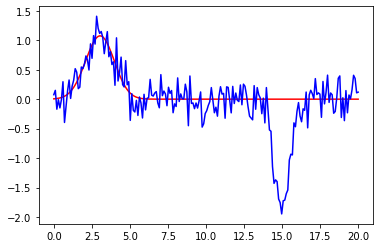

In [0]:
xg = np.linspace(0, 20, 200)
y_doublegauss=func_doublegauss(xg, 1, 3, 1, -2, 15, 0.5)
yn_doublegauss = y_doublegauss + 0.2 * np.random.normal(size=len(xg))
guesses = [1, 3, 1, 1, 15, 1]
popt_doublegauss, pcov_doublegauss = curve_fit(func_doublegauss, xg, yn_doublegauss)
plt.plot(xg, func_doublegauss(xg, *popt_doublegauss), 'r-', xg,  yn_doublegauss, 'b-', )

## 1.2. Solutions to Functions

In [0]:
from scipy.optimize import fsolve
import numpy as np
line = lambda x:x+3
#print(line(6))
solution = fsolve(line, -2)
print (solution)

[-3.]


In [0]:
from scipy.optimize import fsolve
import numpy as np
# Defining function to simplify intersection solution
def findIntersection(func1, func2, x0):
  return (fsolve(lambda x : func1(x) - func2(x), x0)) 
# Defining functions that will intersect
funky = lambda x : np.cos(x / 5) * np.sin(x / 2)
line = lambda x : 0.01 * x - 0.5
# Defining range and getting solutions on intersection points
x = np.linspace(0,45,10000)
result = findIntersection(funky, line, [15, 20, 30, 35, 40, 45])
# Printing out results for x and y
print(result, line(result))

[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ] [-0.36592269 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


## 2. Interpolation

* SciPy offers well over a dozen different functions for interpolation, ranging from those for simple univariate cases to those for complex multivariate ones.
* There are two basic methods of interpolation: (1) Fit one function to an entire dataset or (2) fit different parts of the dataset with several functions where the joints of each function are joined smoothly. The second type is known as a spline interpolation, which can be a very powerful tool when the functional form of data is complex. 

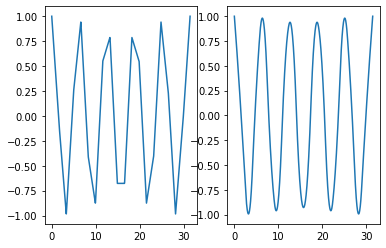

In [0]:
import numpy as np
from scipy.interpolate import interp1d
x = np.linspace(0, 10 * np.pi, 20)    # Setting up data
y = np.cos(x)

fig,a=plt.subplots(1, 2,squeeze=False)
# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')
# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

a[0][0].plot(xint,yintl)
a[0][1].plot(xint,yintq)

plt.show()

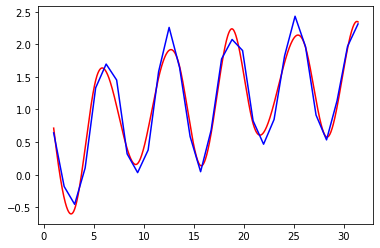

In [0]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.interpolate import UnivariateSpline
# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
# Interpolating the e interpolate noisy data
f = UnivariateSpline(x, y, s=1)
#s is the smoothing factor, which should be used when fitting data with noise. 
#If instead s=0, then the interpolation will go through all points while ignoring
#noise.
# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)

plt.plot(xint,yint,'r')
plt.plot(x,y,'b-')

## 3. Integration

In [0]:
import numpy as np
from scipy.integrate import quad
# Defining function to integrate
func = lambda x: np.cos(np.exp(x)) ** 2
# Integrating function with upper and lower
# limits of 0 and 3, respectively
solution = quad(func, 0, 3)
print (solution)
# The first element is the desired value
# and the second is the error.
# (1.296467785724373, 1.397797186265988e-09)


(1.296467785724373, 1.3977971863744082e-09)


## 4. Statistics

# 1. Continuous and Discrete Distributions
* There are roughly 80 continuous distributions and over 10 discrete distributions.

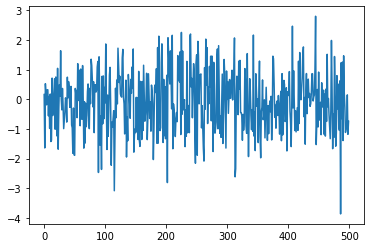

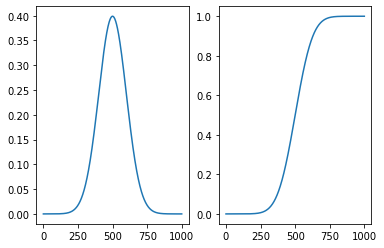

In [0]:
import numpy as np
from scipy.stats import norm
x = np.linspace(-5,5,1000)  # Set up the sample range
dist = norm(loc=0, scale=1) # where loc is the mean and scale is the standard deviation.
pdf = dist.pdf(x) # Retrieving norm's PDF and CDF
cdf = dist.cdf(x)
sample = dist.rvs(500)  # Here we draw out 500 random values from the norm.
plt.plot(sample)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(pdf)
ax2.plot(cdf)

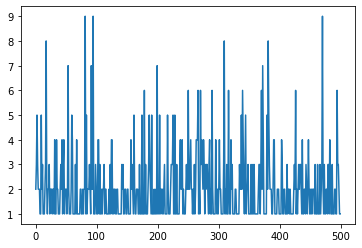

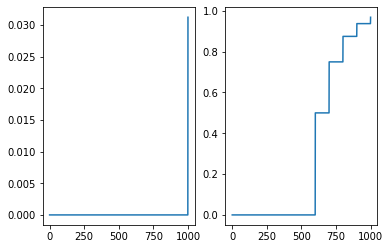

In [0]:
import numpy as np
from scipy.stats import geom
x = np.linspace(-5,5,1000)  # Set up the sample range
dist = geom(p=0.5) # where loc is the mean and scale is the standard deviation.
pmf = dist.pmf(x) # Retrieving  PDF and CDF
cdf = dist.cdf(x)
sample = dist.rvs(500)  # Here we draw out 500 random values from the norm.
plt.plot(sample)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(pmf)
ax2.plot(cdf)

The scipy.interpolate.griddata function is used for its capacity to deal with
unstructured N-dimensional data. For example, if you have a 1000 × 1000-pixel image,
and then randomly selected 1000 points, how well could you reconstruct the image?

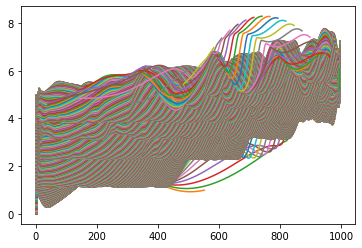

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating gridded data. The complex number defines
# how many steps the grid data should have. Without the
# complex number mgrid would only create a grid data structure
# with 5 steps.
grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]
# Generating sample that interpolation function will see
xy = np.random.rand(1000, 2)
sample = ripple(xy[:,0]*5, xy[:,1] * 5)
# Interpolating data with a cubic
grid_z0 = griddata(xy * 5, sample, (grid_x, grid_y), method='cubic')
plt.plot(grid_x, grid_y)
plt.plot(grid_z0)

In [0]:
import numpy as np
from scipy.interpolate import SmoothBivariateSpline as SBS
# Defining a function
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)
# Generating sample that interpolation function will see
xy= np.random.rand(1000, 2)
x, y = xy[:,0], xy[:,1]
sample = ripple(xy[:,0]*5, xy[:,1] * 5)
# Interpolating data(multivariate spline interpolation)
fit = SBS(x * 5, y * 5, sample, s=0.01, kx=4, ky=4) #remove glitches/smooth func
interp = fit(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000))


/usr/local/lib/python3.6/dist-packages/scipy/interpolate/fitpack2.py:1065: UserWarning: ier=41669
  warnings.warn(message)


## 5. Spatial and Clustering Analysis

From biological to astrophysical sciences, spatial and clustering analysis are key to identifying patterns, groups, and clusters. 

With big data and data mining, identifying data clusters is becoming important, in order to organize discovered information, rather than being overwhelmed by it.

* SciPy provides a spatial analysis class (scipy.spatial) and a cluster analysis class
(scipy.cluster). The spatial class includes functions to analyze distances between data
points (e.g., k-d trees). The cluster class provides two overarching subclasses: vector
quantization (vq) and hierarchical clustering (hierarchy). 

* Vector quantization groups
large sets of data points (vectors) where each group is represented by centroids. The
hierarchy subclass contains functions to construct clusters and analyze their substructures.

In [0]:
from numpy import array,random
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],[ 1.5,2.5],[ 0.8,0.6],[ 0.4,1.8],
  [ 0.1,0.1],[ 0.2,1.8],[ 2.0,0.5],[ 0.3,1.5],[ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)
random.seed((1000,2000))
codes = 3
kmeans(whitened,codes)

(array([[1.40584568, 0.69587293],
        [2.45121811, 3.03653641],
        [0.4325679 , 2.15087996]]), 0.5511808116483707)

Performs k-means on a set of observation vectors forming k clusters.The k-means algorithm adjusts the classification of the observations into clusters and updates the cluster centroids until the position of the centroids is stable over successive iterations.

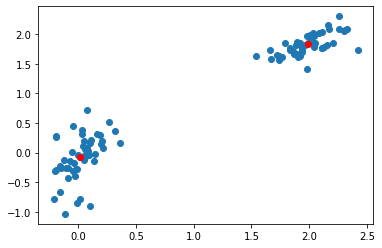

In [0]:
from numpy import array,random
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],[[10, 2], [2, 1]],size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

Kmeans2:
Classify a set of observations into k clusters using the k-means algorithm.

The algorithm attempts to minimize the Euclidian distance between observations and centroids. Several initialization methods are included.

[[-0.35770296  5.31342524]
 [ 2.32210289 -0.50551972]
 [ 6.17653859  4.16719247]]
[52 27 21]


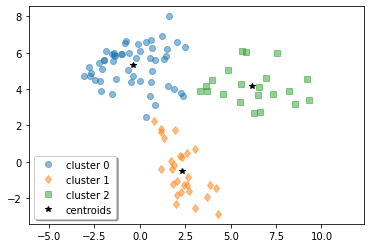

In [0]:
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
#Create z, an array with shape (100, 2) containing a mixture of samples from three multivariate normal distributions.
np.random.seed(12345678)
a = np.random.multivariate_normal([0, 6], [[2, 1], [1, 1.5]], size=45)
b = np.random.multivariate_normal([2, 0], [[1, -1], [-1, 3]], size=30)
c = np.random.multivariate_normal([6, 4], [[5, 0], [0, 1.2]], size=25)
z = np.concatenate((a, b, c))
np.random.shuffle(z)
#Compute three clusters.
centroid, label = kmeans2(z, 3, minit='points')
print(centroid)
#How many points are in each cluster?
counts = np.bincount(label)
print(counts)
#Plot the clusters.
w0 = z[label == 0]
w1 = z[label == 1]
w2 = z[label == 2]
plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')
plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')
plt.plot(w2[:, 0], w2[:, 1], 's', alpha=0.5, label='cluster 2')
plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')
plt.axis('equal')
plt.legend(shadow=True)
plt.show()